In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score,precision_score

RANDOM_SEED=2021
TEST_PCT=0.3
LABELS=["Normal","Fraud"]

2022-11-01 14:44:03.985975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 14:44:04.214580: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-01 14:44:04.952565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-01 14:44:04.952624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
dataset=pd.read_csv("creditcard.csv")

In [3]:
print("Any nulls in the dataset", dataset.isnull().values.any())
print('---------')
print("No of unique labels",len(dataset['Class'].unique()))
print("Label values", dataset.Class.unique())

Any nulls in the dataset False
---------
No of unique labels 2
Label values [0 1]


In [4]:
print("--------")

--------


In [5]:
print("--------")
print("Break Down of Normal and Fraud Transactions")
print(pd.value_counts(dataset['Class'],sort=True))

--------
Break Down of Normal and Fraud Transactions
0    284315
1       492
Name: Class, dtype: int64


In [6]:
print("Any nulls in the dataset", dataset.isnull().values.any())
print('---------')
print("No of unique labels",len(dataset['Class'].unique()))
print("Label values", dataset.Class.unique())


print("--------")
print("Break Down of Normal and Fraud Transactions")
print(pd.value_counts(dataset['Class'],sort=True))

Any nulls in the dataset False
---------
No of unique labels 2
Label values [0 1]
--------
Break Down of Normal and Fraud Transactions
0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Number of observation')

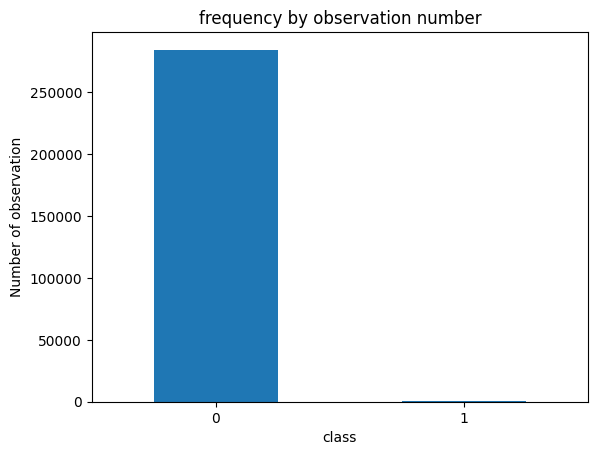

In [7]:
count_classes=pd.value_counts(dataset['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.xticks(range(len(dataset['Class'].unique())),dataset.Class.unique())
plt.title("frequency by observation number")
plt.xlabel("class")
plt.ylabel("Number of observation")

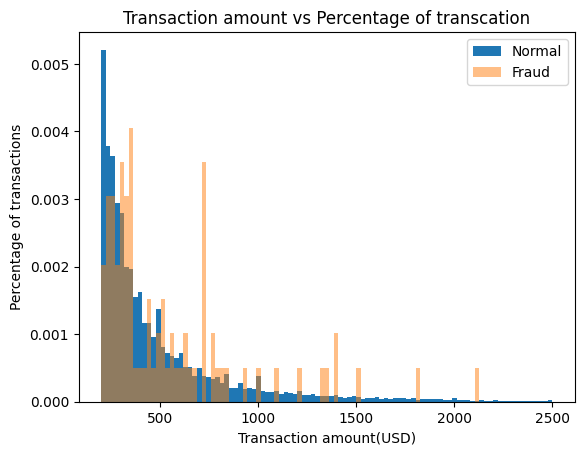

In [8]:
normal_dataset=dataset[dataset.Class ==0]
fraud_dataset =dataset[dataset.Class==1]


bins=np.linspace(200,2500,100)
plt.hist(normal_dataset.Amount,bins=bins,alpha=1,density=True,label='Normal')
plt.hist(fraud_dataset.Amount,bins=bins,alpha=0.5,density=True,label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transcation")
plt.xlabel("Transaction amount(USD)")
plt.ylabel("Percentage of transactions")
plt.show()

In [9]:


sc=StandardScaler()
dataset['Time']=sc.fit_transform(dataset['Time'].values.reshape(-1,1))
dataset['Amount']=sc.fit_transform(dataset['Amount'].values.reshape(-1,1))
raw_data=dataset.values
labels=raw_data[:,-1]

data=raw_data[:,0:-1]

train_data, test_data, train_labels, test_labels =train_test_split(data, labels,test_size=0.2,random_state=2021)



In [10]:
min_val=tf.reduce_min(train_data)
max_val=tf.reduce_max(train_data)

train_data=(train_data-min_val)/(max_val - min_val)

train_data =tf.cast(train_data,tf.float32)

test_data=tf.cast(test_data,tf.float32)

2022-11-01 14:44:09.009721: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-01 14:44:09.009760: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (turing-machine): /proc/driver/nvidia/version does not exist
2022-11-01 14:44:09.011067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 14:44:09.013227: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 54682800 exceeds 10% of free system memory.
2022-11-01 14:44:09.088044: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 54682800 exceeds 10% of free system memory.
2022-11-01 

In [11]:
train_labels=train_labels.astype(bool)
test_labels=test_labels.astype(bool)

normal_train_data=train_data[~train_labels]
normal_test_data=test_data[~test_labels]

fraud_train_data=train_data[train_labels]

fraud_test_data=test_data[test_labels]

print("No of records in fraud Train Data=",len(fraud_train_data))

print("No of records in normal Train Data=",len(normal_train_data))

print("No of records in fraud test Data=",len(fraud_test_data))

print("No of records in normal test Data=",len(normal_test_data))

No of records in fraud Train Data= 389
No of records in normal Train Data= 227456
No of records in fraud test Data= 103
No of records in normal test Data= 56859


In [12]:
nb_epoch=50
batch_size =64
input_dim=normal_train_data.shape[1]

encoding_dim=14
hidden_dim_1=int(encoding_dim/2)
hidden_dim_2=4

learning_rate=1e-7


In [13]:
input_layer =tf.keras.layers.Input(shape=(input_dim,))
encoder=tf.keras.layers.Dense(encoding_dim,activation="tanh", activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)

encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder=tf.keras.layers.Dense(hidden_dim_1,activation='relu')(encoder)

encoder=tf.keras.layers.Dense(hidden_dim_2,activation=tf.nn.leaky_relu)(encoder)


decoder=tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)

decoder=tf.keras.layers.Dense(encoding_dim,activation='relu')(decoder)
decoder=tf.keras.layers.Dense(input_dim,activation='tanh')(decoder)


autoencoder=tf.keras.Model(inputs=input_layer,outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

In [14]:
cp=tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",mode='min',monitor='val_loss',verbose=2,save_best_only=True)
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=10,
                                                verbose=1,mode='min',restore_best_weights=True)

In [15]:
autoencoder.compile(metrics=['accuracy'],loss='mean_squared_error', optimizer='adam')

In [16]:
history=autoencoder.fit(normal_train_data,normal_train_data,epochs=nb_epoch,batch_size=batch_size,shuffle=True,validation_data=(test_data,test_data),verbose=1
                        ).history

Epoch 1/50
3554/3554 [==============================] - 5s 1ms/step - loss: 0.0037 - accuracy: 0.0367 - val_loss: 1.3082 - val_accuracy: 0.0244
Epoch 2/50
3554/3554 [==============================] - 4s 1ms/step - loss: 1.9514e-05 - accuracy: 0.0609 - val_loss: 1.3087 - val_accuracy: 0.0304
Epoch 3/50
3554/3554 [==============================] - 4s 1ms/step - loss: 1.9459e-05 - accuracy: 0.0650 - val_loss: 1.3193 - val_accuracy: 0.0477
Epoch 4/50
3554/3554 [==============================] - 4s 1ms/step - loss: 1.9292e-05 - accuracy: 0.0814 - val_loss: 1.3589 - val_accuracy: 0.0414
Epoch 5/50
3554/3554 [==============================] - 4s 1ms/step - loss: 1.9619e-05 - accuracy: 0.0605 - val_loss: 1.2906 - val_accuracy: 0.0578
Epoch 6/50
3554/3554 [==============================] - 5s 1ms/step - loss: 1.9511e-05 - accuracy: 0.0598 - val_loss: 1.3191 - val_accuracy: 0.0414
Epoch 7/50
3554/3554 [==============================] - 4s 1ms/step - loss: 1.9564e-05 - accuracy: 0.0593 - val_loss

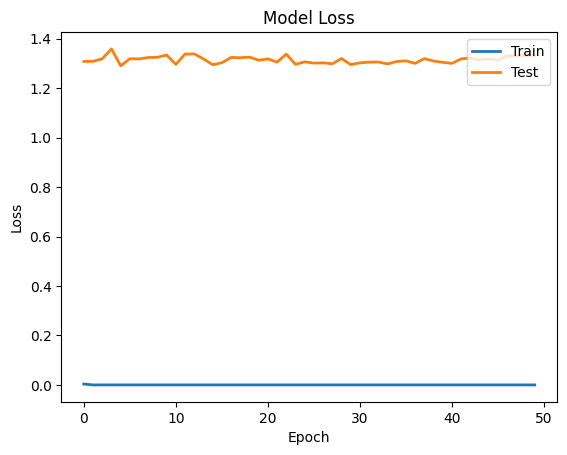

In [17]:
plt.plot(history['loss'],linewidth=2,label='Train')
plt.plot(history['val_loss'],linewidth=2,label='Test')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [18]:
test_x_predictions=autoencoder.predict(test_data)
mse=np.mean(np.power(test_data-test_x_predictions,2),axis=1)
error_df=pd.DataFrame({'Reconstruction_error':mse, 'True_class':test_labels})

1781/1781 [==============================] - 2s 892us/step


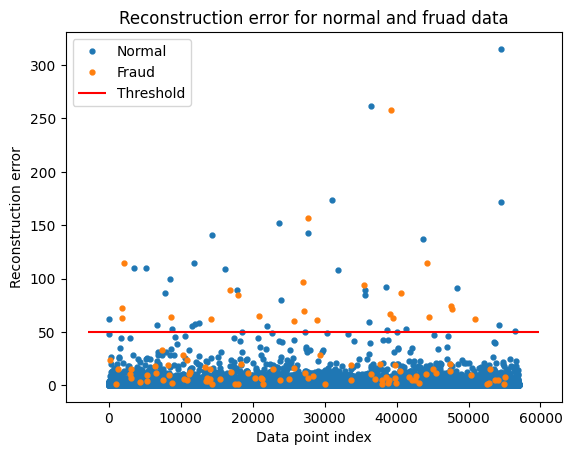

In [19]:
threshold_fixed=50
groups=error_df.groupby('True_class')
fig,ax=plt.subplots()

for name,group in groups:
    ax.plot(group.index,group.Reconstruction_error, marker='o',ms=3.5,linestyle='',label="Fraud" if name==1 else "Normal")
ax.hlines(threshold_fixed,ax.get_xlim()[0],ax.get_xlim()[1],colors="r",zorder=100,label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fruad data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

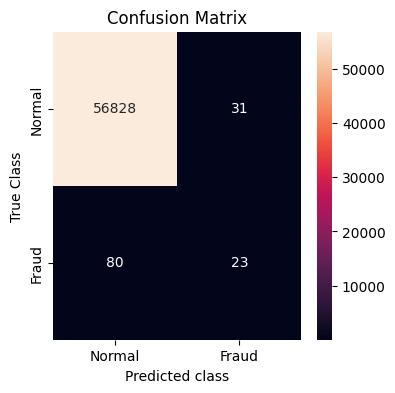

Accuracy: 0.9980513324672589
REcall: 0.22330097087378642
precision: 0.42592592592592593


In [20]:
threshold_fixed=52
pred_y=[1 if e> threshold_fixed else 0
        for e in error_df.Reconstruction_error.values]
error_df['pred']=pred_y
conf_matrix=confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix,xticklabels=LABELS, yticklabels=LABELS, annot=True,fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted class')
plt.show()


print("Accuracy:", accuracy_score(error_df['True_class'],error_df['pred']))
print("REcall:", recall_score(error_df['True_class'],error_df['pred']))
print("precision:", precision_score(error_df['True_class'], error_df['pred']))